In this case study, 

Label - 0 is normal SQL query

Label - 1 is SQL injected query

In [ ]:
#Importing the required libraries
import pandas as pd
from tqdm import tqdm
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle, islice
import re
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
!unzip /content/Modified_SQL_Dataset.csv.zip

In [ ]:
data=pd.read_csv('/content/Modified_SQL_Dataset.csv')
data.head()

,Query,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 tempora...,1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1


In [ ]:
y=data['Label']
X=data.drop('Label',axis = 1)
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.25,random_state=40)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(23189, 1) (23189,)
(7730, 1) (7730,)


In [ ]:
X_train['Label']=y_train
X_test['Label']=y_test

In [ ]:
X_train.head()

,Query,Label
20410,SELECT AVG ( theory ) FROM none,0
920,-5021'+ ( select yadq where 4285 = 4285 or...,1
9095,select case when 8237 = 9948 then 1 else nul...,1
8145,1' ) ) as nsfx where 9553 = 9553 rli...,1
4032,-1084 where 1181 = 1181 or make_set ( 9354...,1


#Preprocessing

In preprocessing:

1..query strings have been converted to lower case

2.. duplicate entries are removed. 

3..checking for null records

In [ ]:
X_train['Query'] = X_train['Query'].str.lower()

In [ ]:
#Quora Q&A case study
pair_duplicates = X_train[['Query','Label']].groupby(['Query','Label']).count().reset_index()

print ("Number of duplicate entries",X_train.shape[0]-(pair_duplicates).shape[0])

Number of duplicate entries 14


In [ ]:
X_train.drop_duplicates(subset=['Query'],keep=False,inplace=True)

In [ ]:
pair_duplicates = X_train[['Query','Label']].groupby(['Query','Label']).count().reset_index()
print ("Number of duplicate entries",X_train.shape[0]-(pair_duplicates).shape[0])

Number of duplicate entries 0


In [ ]:
nan_rows = X_train[X_train.isnull().any(1)]
print(nan_rows)

Empty DataFrame
Columns: [Query, Label]
Index: []


#Featurization

In [ ]:
#https://www.geeksforgeeks.org/extract-punctuation-from-the-specified-column-of-dataframe-using-regex/
#https://stackoverflow.com/a/41699833

def number_of_single_quotations(stringtxt):
    return len(re.findall("\'", stringtxt))
def number_of_double_quotations(stringtxt):
    return len(re.findall("\"", stringtxt))
def number_of_commas(stringtxt):
    return len(re.findall("\,", stringtxt))
def number_of_punctuations(stringtxt):
    return len(re.findall("[!\"#$%&\'()*+,-.\/:;<=>?@[\\]^_`{|}~]", stringtxt))
def number_of_singlelinecomment(stringtxt):
    return len(re.findall(r'--.*', stringtxt))
def number_of_multilinecomment(stringtxt):
    return len(re.findall(r'\/\*', stringtxt))
def number_of_whitespace(stringtxt):
    return len(re.findall(r'\s+', stringtxt))
def number_of_percentages(stringtxt):
    return len(re.findall(r'%', stringtxt))
def number_of_logicalop(stringtxt):
    return len(re.findall(r'\snot\s|\sand\s|\sor\s|\sxor\s|&&|\|\||!', stringtxt))
def number_of_op(stringtxt):
    return len(re.findall(r'\*|\+|\-|\>|\<|\/|\/', stringtxt)) # +-*/<>
def number_of_hexvalues(stringtxt):
    return len(re.findall(r'0[xX][0-9a-fA-F]+', stringtxt)) 
def number_of_alphabets(stringtxt):
    return len(re.findall(r'[a-z]', stringtxt))   
def number_of_digits(stringtxt):
    return len(re.findall(r'[0-9]', stringtxt)) 
def number_of_exists(stringtxt):
    return len(re.findall(r'\sexists\s', stringtxt)) 
def number_of_DBkeywords(stringtxt):
    return len(re.findall(r'\ssysobjects\s|msysobjects\s|version\s', stringtxt))  
def number_of_execcmd(stringtxt):
    return len(re.findall(r'\sexec\s', stringtxt)) 
def number_of_parentheses(stringtxt):
    return len(re.findall(r'\(|\)', stringtxt))
def number_of_squarebrackets(stringtxt):
    return len(re.findall(r'\[|\]', stringtxt))
def number_of_angularbrackets(stringtxt):
    return len(re.findall(r'\<|\>', stringtxt))
def number_of_curlybrackets(stringtxt):
    return len(re.findall(r'\{|\}', stringtxt))
def number_of_atsymbol(stringtxt):
    return len(re.findall(r'\@', stringtxt))
def number_of_hashsymbol(stringtxt):
    return len(re.findall(r'\#', stringtxt))
def number_of_colonsymbol(stringtxt):
    return len(re.findall(r'\:', stringtxt))
def number_of_semicolonsymbol(stringtxt):
    return len(re.findall(r'\;', stringtxt))
def number_of_equalssymbol(stringtxt):
    return len(re.findall(r'\=', stringtxt))
def number_of_dollarsymbol(stringtxt):
    return len(re.findall(r'\$', stringtxt))
def number_of_nulls(stringtxt):
    return len(re.findall(r'null', stringtxt))
def number_of_floor(stringtxt):
    return len(re.findall(r'floor()', stringtxt))
def number_of_rand(stringtxt):
    return len(re.findall(r'rand()', stringtxt))

In [ ]:
X_train['no_sngle_quts']   = X_train['Query'].apply(number_of_single_quotations)
X_train['no_dble_quts']    = X_train['Query'].apply(number_of_double_quotations)
X_train['no_commas']       = X_train['Query'].apply(number_of_commas)
X_train['no_punctn']       = X_train['Query'].apply(number_of_punctuations)
X_train['no_sgle_cmnt']    = X_train['Query'].apply(number_of_singlelinecomment)
X_train['no_mlt_cmnt']     = X_train['Query'].apply(number_of_multilinecomment)
X_train['no_whte_spce']    = X_train['Query'].apply(number_of_whitespace)
X_train['no_prctge']       = X_train['Query'].apply(number_of_percentages)
X_train['no_log_oprtr']    = X_train['Query'].apply(number_of_logicalop)
X_train['no_oprtr']        = X_train['Query'].apply(number_of_op)
X_train['no_hexdcml_valus']= X_train['Query'].apply(number_of_hexvalues)
X_train['no_alphabet']     = X_train['Query'].apply(number_of_alphabets)
X_train['no_digits']       = X_train['Query'].apply(number_of_digits)
X_train['no_exists']       = X_train['Query'].apply(number_of_exists)
X_train['no_db_keywords']  = X_train['Query'].apply(number_of_DBkeywords)
X_train['no_execcmd']      = X_train['Query'].apply(number_of_execcmd)
X_train['no_parentheses']  = X_train['Query'].apply(number_of_parentheses)
X_train['no_squarebracket']= X_train['Query'].apply(number_of_squarebrackets)
X_train['no_curlybrackets']= X_train['Query'].apply(number_of_curlybrackets)
X_train['no_anglebracket'] = X_train['Query'].apply(number_of_angularbrackets)
X_train['no_atsymbol']     = X_train['Query'].apply(number_of_atsymbol)
X_train['no_hash']         = X_train['Query'].apply(number_of_hashsymbol)
X_train['no_colon']        = X_train['Query'].apply(number_of_colonsymbol)
X_train['no_semicolon']    = X_train['Query'].apply(number_of_semicolonsymbol)
X_train['no_equals']       = X_train['Query'].apply(number_of_equalssymbol)
X_train['no_dollarsymbol'] = X_train['Query'].apply(number_of_dollarsymbol)
X_train['no_nulls']        = X_train['Query'].apply(number_of_nulls)
X_train['no_floor']        = X_train['Query'].apply(number_of_floor)
X_train['no_rand']         = X_train['Query'].apply(number_of_rand)

In [ ]:
#https://github.com/shreekanthsenthil/SQL-Injection-Detection/blob/master/sqli_detection.ipynb
"""This user defined function is to select sql keywords and count the number of occurrences of keyword in SQL query string"""
def cal_keyword(X_train,col,key_col,l):
  for i, query in enumerate(X_train[col]):
    count = 0
    words = query.split()
    for word in words:
      if word in l:
        count = count+1
    X_train[key_col][i] = count
  return X_train

In [ ]:
X_train['keyword'] = 0
X_train = cal_keyword(X_train, 'Query', 'keyword', ["select", "update", "insert", "create", "drop", "alter", "rename", "exec", "order", "group", "sleep","count","where"])


#EDA

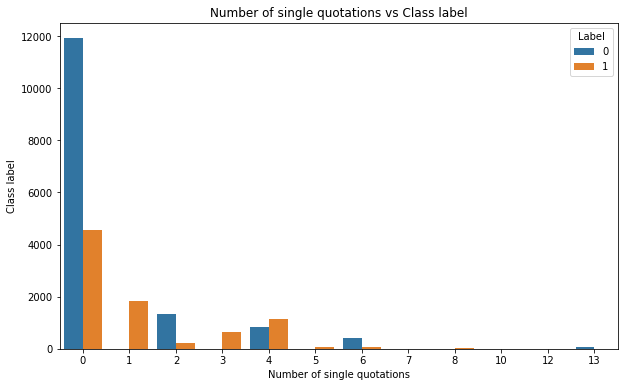

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x = 'no_sngle_quts',hue = 'Label',data = X_train)
sns.move_legend(ax, "upper right")
plt.xlabel("Number of single quotations")
plt.ylabel("Class label")
plt.title('Number of single quotations vs Class label')
plt.show()

It can be seen that when the number of single quotations is even, then it is mostly not a SQL injection query(2,6). This means the value is properly enclosed within opening and closing quotes. When the number of quotes is 3 or 5, it is SQL injection query

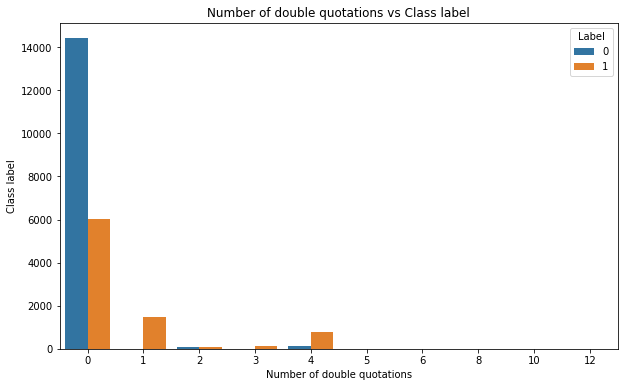

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x = 'no_dble_quts',hue = 'Label',data = X_train)
sns.move_legend(ax, "upper right")
plt.xlabel("Number of double quotations")
plt.ylabel("Class label")
plt.title('Number of double quotations vs Class label')
plt.show()

When the number of double quotations is 1 or 3, then it is a SQL injection query. But, when it is 2, it is hardly distinguishable

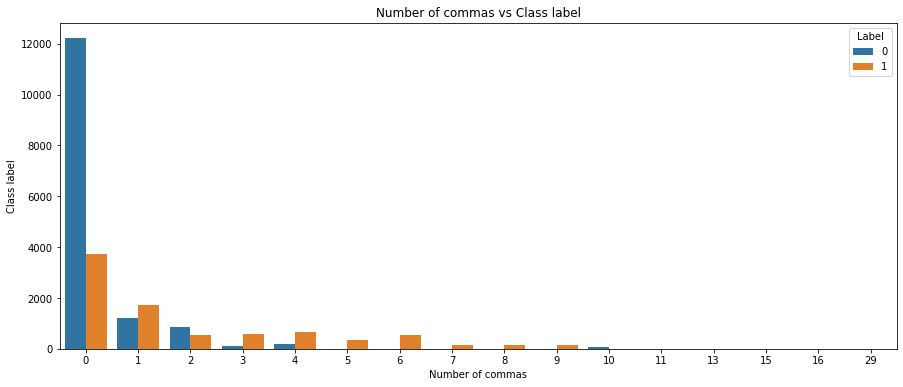

In [ ]:
plt.figure(figsize=(15,6))
ax=sns.countplot(x = 'no_commas',hue = 'Label',data = X_train)
sns.move_legend(ax, "upper right")
plt.xlabel("Number of commas")
plt.ylabel("Class label")
plt.title('Number of commas vs Class label')
plt.show()

When there are more commas, it is SQL injection

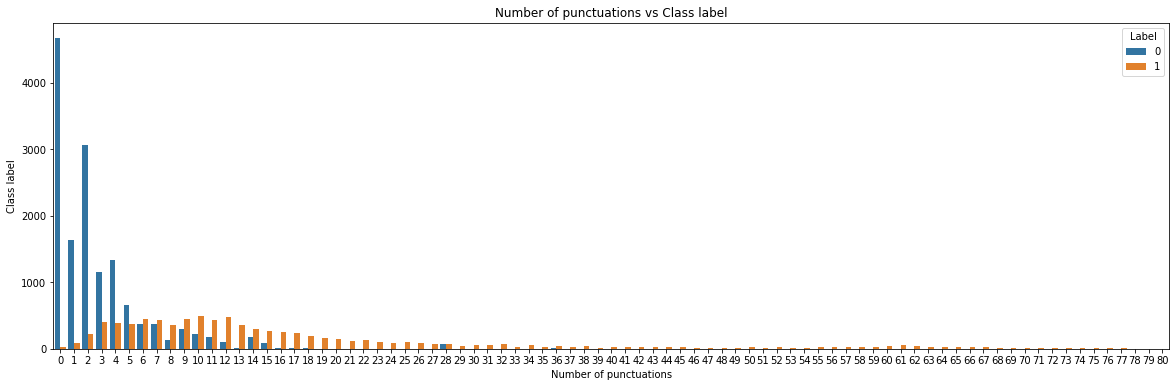

In [ ]:
plt.figure(figsize=(20,6))
ax=sns.countplot(x = 'no_punctn',hue = 'Label',data = X_train)
sns.move_legend(ax, "upper right")
plt.xlabel("Number of punctuations")
plt.ylabel("Class label")
plt.title('Number of punctuations vs Class label')
plt.show()

When there are many punctuations in a query, it is most likely to be SQL injection. Fewer punctuations (less than 5) are seen in normal legitimate queries. 

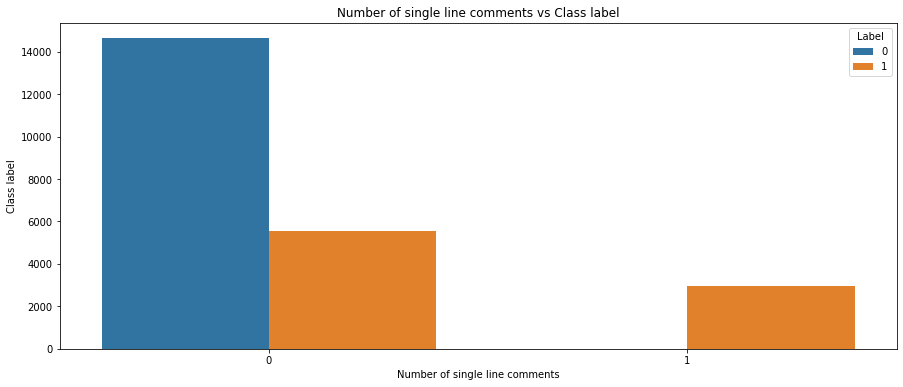

In [ ]:
plt.figure(figsize=(15,6))
ax=sns.countplot(x = 'no_sgle_cmnt',hue = 'Label',data = X_train)
sns.move_legend(ax, "upper right")
plt.xlabel("Number of single line comments")
plt.ylabel("Class label")
plt.title("Number of single line comments vs Class label")
plt.show()

It is very clear from the above chart that when there is only one single line comment, then it is most likely to be SQL injection

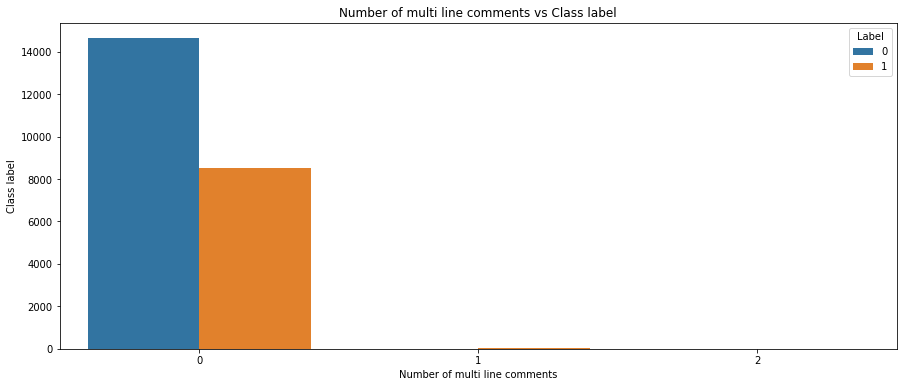

In [ ]:
plt.figure(figsize=(15,6))
ax=sns.countplot(x = 'no_mlt_cmnt',hue = 'Label',data = X_train)
sns.move_legend(ax, "upper right")
plt.xlabel("Number of multi line comments")
plt.ylabel("Class label")
plt.title("Number of multi line comments vs Class label")
plt.show()

We cannot make any conclusions from multi line comments as it is very few in number for SQL injection

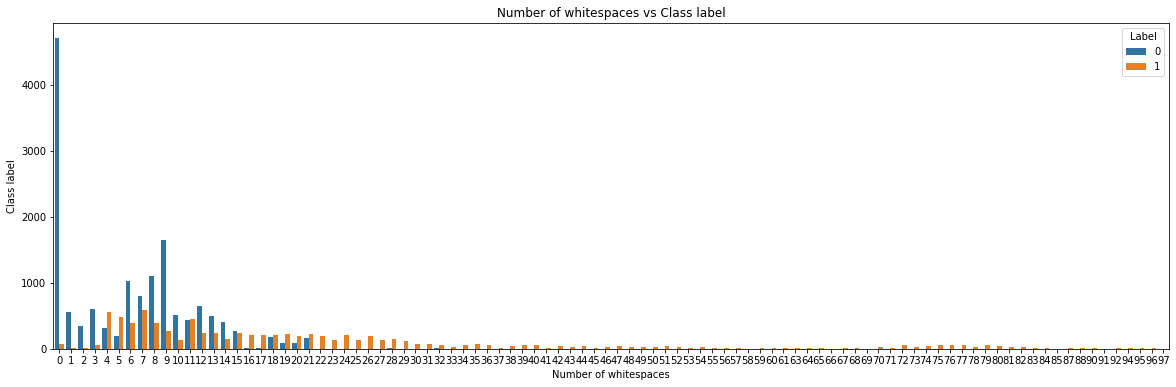

In [ ]:
plt.figure(figsize=(20,6))
ax=sns.countplot(x = 'no_whte_spce',hue = 'Label',data = X_train)
sns.move_legend(ax, "upper right")
plt.xlabel("Number of whitespaces")
plt.ylabel("Class label")
plt.title("Number of whitespaces vs Class label")
plt.show()

If there are more whitespaces in a SQL query, it means it is clearly SQL injection. Normal query has upto 15 whitespaces

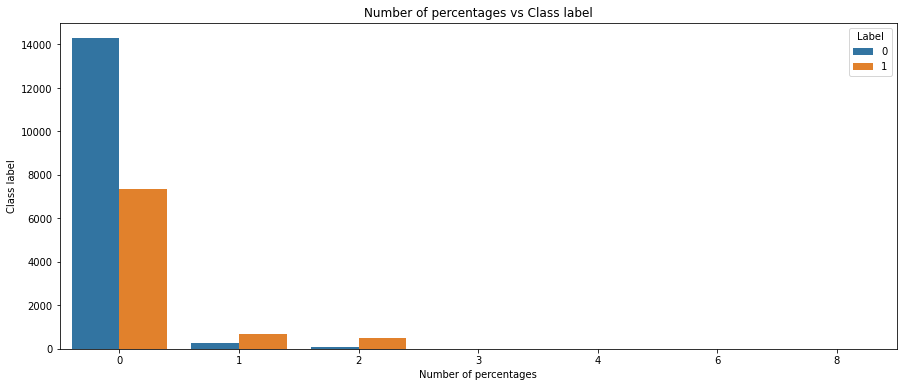

In [ ]:
plt.figure(figsize=(15,6))
ax=sns.countplot(x = 'no_prctge',hue = 'Label',data = X_train)
sns.move_legend(ax, "upper right")
plt.xlabel("Number of percentages")
plt.ylabel("Class label")
plt.title("Number of percentages vs Class label")
plt.show()

Number of percentage is useful feature as it helps in distinction between SQL injection query and legitimate query

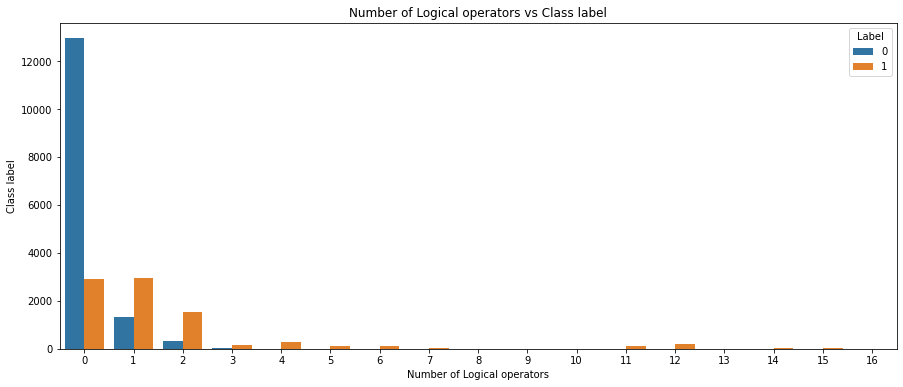

In [ ]:
plt.figure(figsize=(15,6))
ax=sns.countplot(x = 'no_log_oprtr',hue = 'Label',data = X_train)
sns.move_legend(ax, "upper right")
plt.xlabel("Number of Logical operators")
plt.ylabel("Class label")
plt.title("Number of Logical operators vs Class label")
plt.show()

Possibility for a SQL string to be SQL injection query is high when the number of logical operators is high

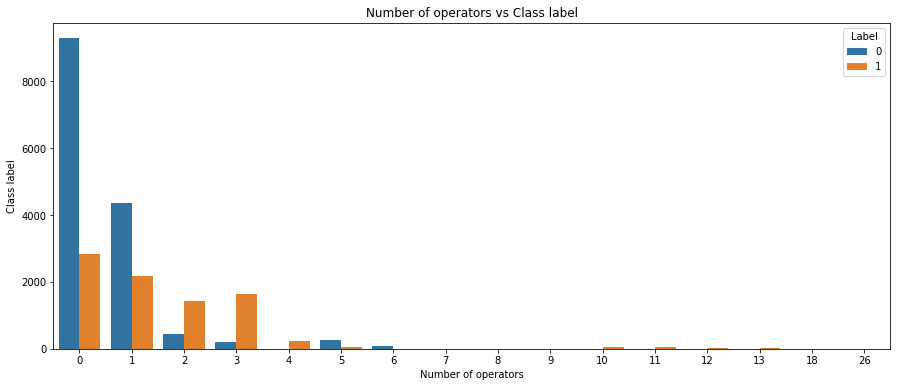

In [ ]:
plt.figure(figsize=(15,6))
ax=sns.countplot(x = 'no_oprtr',hue = 'Label',data = X_train)
sns.move_legend(ax, "upper right")
plt.xlabel("Number of operators")
plt.ylabel("Class label")
plt.title("Number of operators vs Class label")
plt.show()

When the number of operators is greater than or equal to 10, then that is surely a SQL injection query

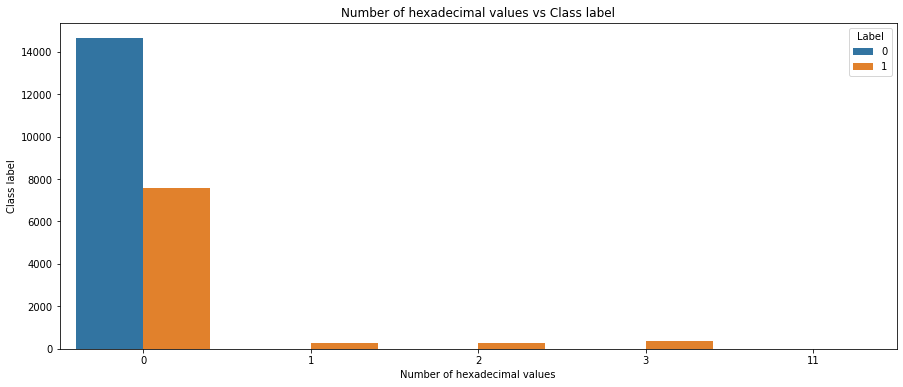

In [ ]:
plt.figure(figsize=(15,6))
ax=sns.countplot(x = 'no_hexdcml_valus',hue = 'Label',data = X_train)
sns.move_legend(ax, "upper right")
plt.xlabel("Number of hexadecimal values")
plt.ylabel("Class label")
plt.title("Number of hexadecimal values vs Class label")
plt.show()

When hexadecimal values occur in query, it is SQL injection

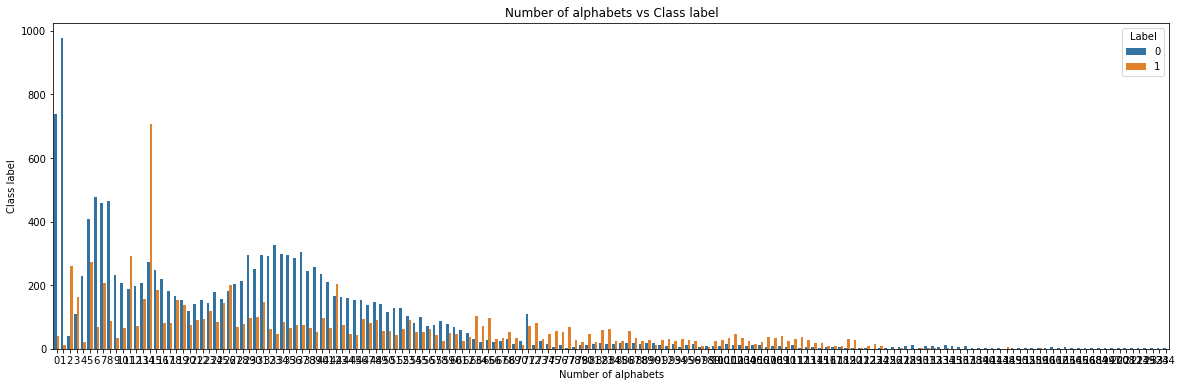

In [ ]:
plt.figure(figsize=(20,6))
ax=sns.countplot(x = 'no_alphabet',hue = 'Label',data = X_train)
sns.move_legend(ax, "upper right")
plt.xlabel("Number of alphabets")
plt.ylabel("Class label")
plt.title("Number of alphabets vs Class label")
plt.show()

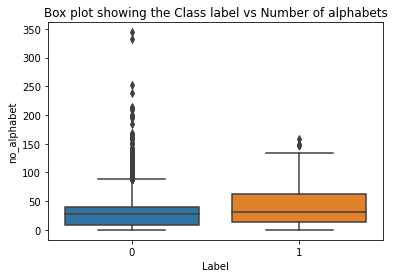

In [ ]:
sns.boxplot(data=X_train, x="Label", y="no_alphabet")
plt.title("Box plot showing the Class label vs Number of alphabets")
plt.show()

When the number of alphabets is more, it is SQL injection

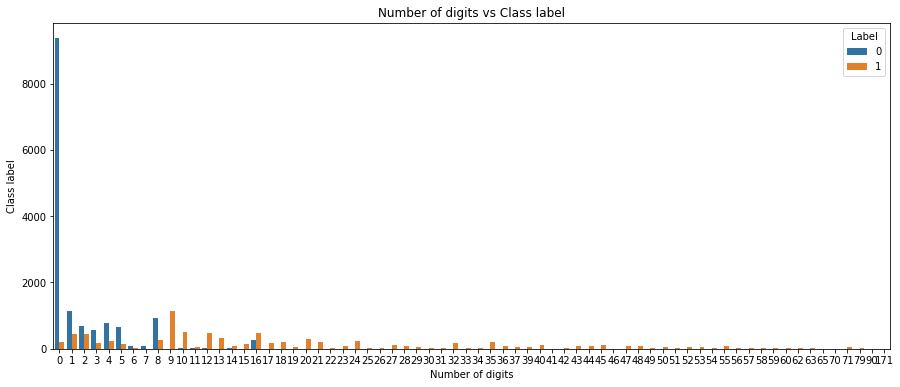

In [ ]:
plt.figure(figsize=(15,6))
ax=sns.countplot(x = 'no_digits',hue = 'Label',data = X_train)
sns.move_legend(ax, "upper right")
plt.xlabel("Number of digits")
plt.ylabel("Class label")
plt.title("Number of digits vs Class label")
plt.show()

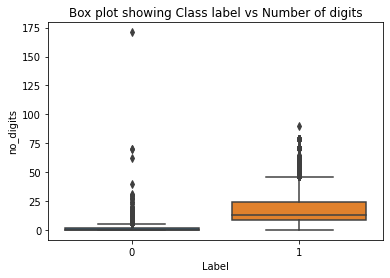

In [ ]:
sns.boxplot(data=X_train, x="Label", y="no_digits")
plt.title("Box plot showing Class label vs Number of digits")
plt.show()

We can see from the box plot that when number of digits increases, it is SQL-injection query.

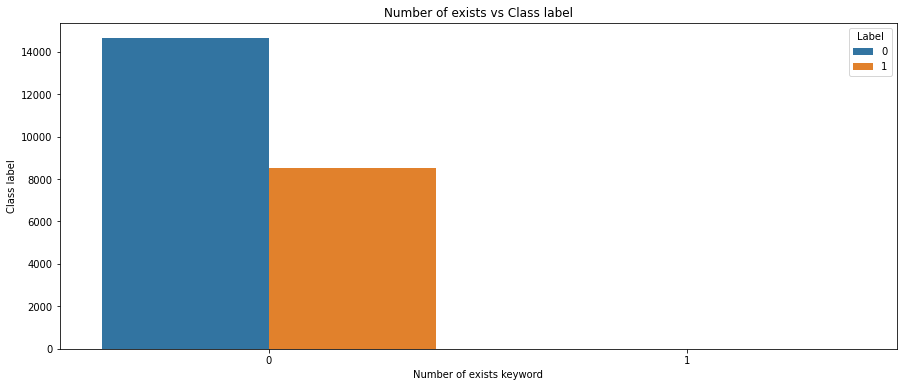

In [ ]:
plt.figure(figsize=(15,6))
ax=sns.countplot(x = 'no_exists',hue = 'Label',data = X_train)
sns.move_legend(ax, "upper right")
plt.xlabel("Number of exists keyword")
plt.ylabel("Class label")
plt.title("Number of exists vs Class label")
plt.show()

Using the exists keyword alone, we will not be able to classify a query as SQL-injection or not. 

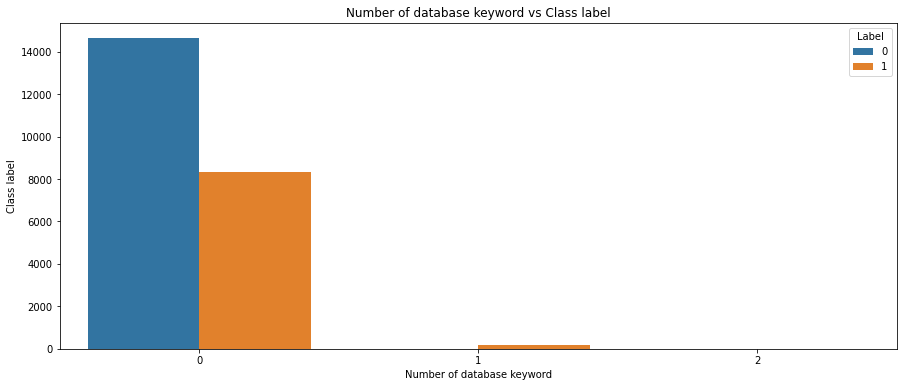

In [ ]:
plt.figure(figsize=(15,6))
ax=sns.countplot(x = 'no_db_keywords',hue = 'Label',data = X_train)
sns.move_legend(ax, "upper right")
plt.xlabel("Number of database keyword")
plt.ylabel("Class label")
plt.title("Number of database keyword vs Class label")
plt.show()

When database keyword occur once, it is SQL-injection query

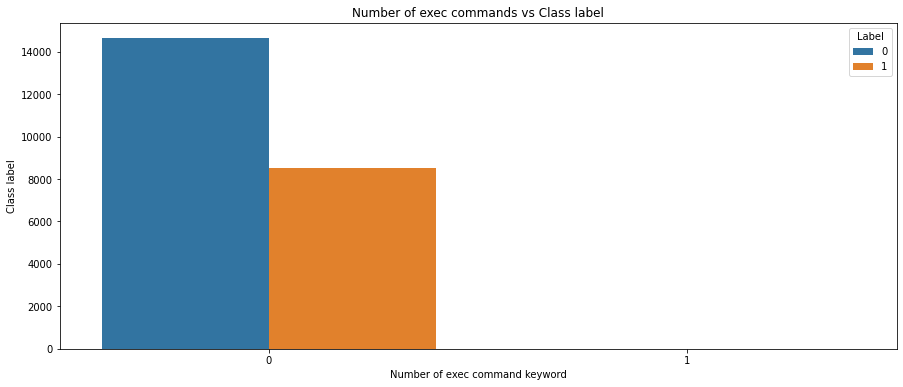

In [ ]:
plt.figure(figsize=(15,6))
ax=sns.countplot(x = 'no_execcmd',hue = 'Label',data = X_train)
sns.move_legend(ax, "upper right")
plt.xlabel("Number of exec command keyword")
plt.ylabel("Class label")
plt.title("Number of exec commands vs Class label")
plt.show()

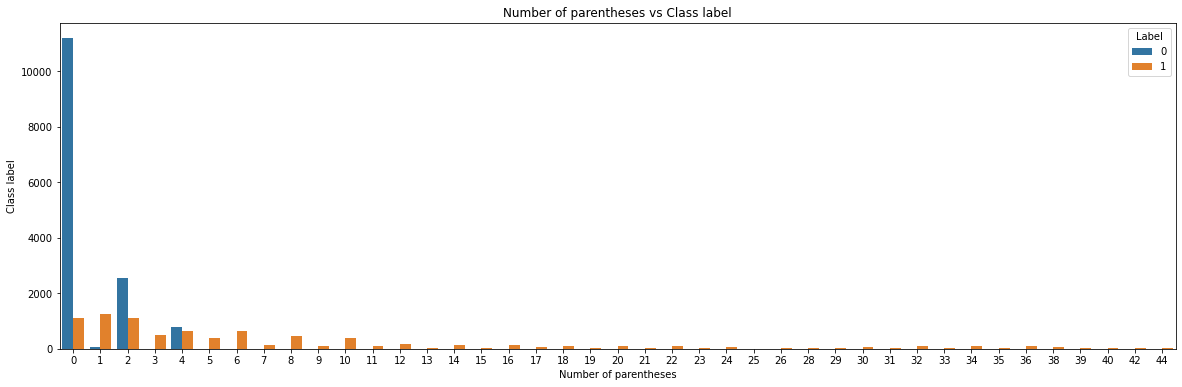

In [ ]:
plt.figure(figsize=(20,6))
ax=sns.countplot(x = 'no_parentheses',hue = 'Label',data = X_train)
sns.move_legend(ax, "upper right")
plt.xlabel("Number of parentheses")
plt.ylabel("Class label")
plt.title("Number of parentheses vs Class label")
plt.show()

When the number of parenthesis is odd or is greater than 5, it shows that the SQL query could be of injection. If we have 2 or 4 parenthesis, then it is normal query

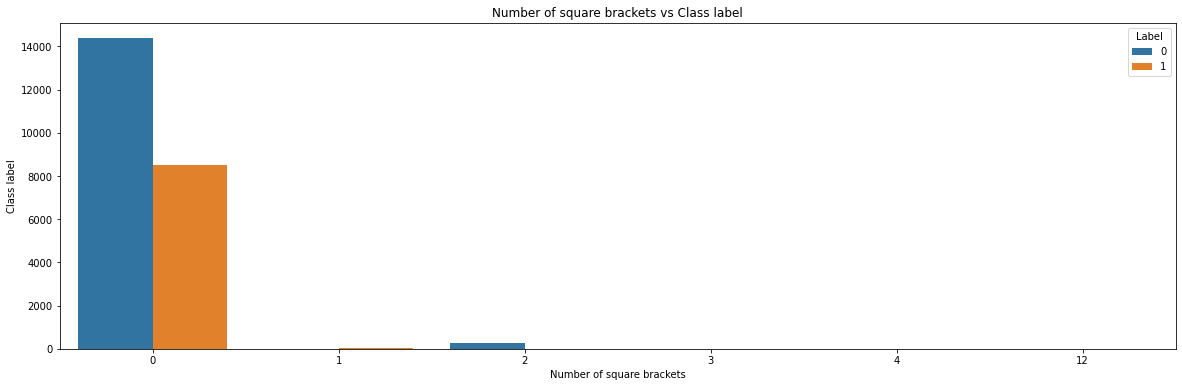

In [ ]:
plt.figure(figsize=(20,6))
ax=sns.countplot(x = 'no_squarebracket',hue = 'Label',data = X_train)
sns.move_legend(ax, "upper right")
plt.xlabel("Number of square brackets")
plt.ylabel("Class label")
plt.title("Number of square brackets vs Class label")
plt.show()

When the number of square brackets is 2, it is regular SQL query. When the number of bracket is 1, it is SQL injected query

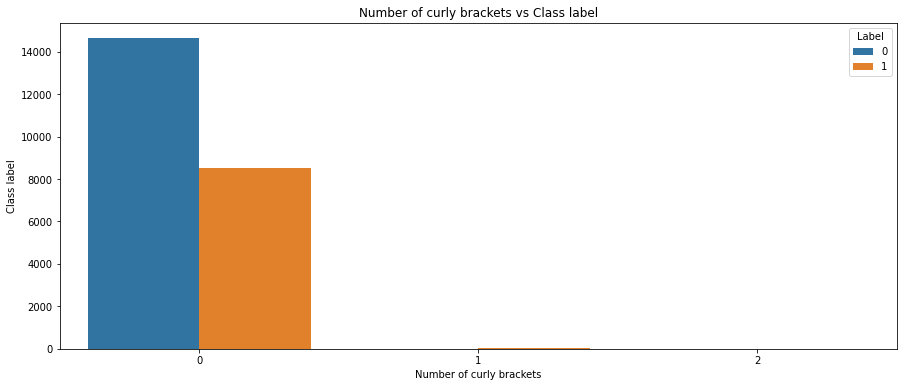

In [ ]:
plt.figure(figsize=(15,6))
ax=sns.countplot(x = 'no_curlybrackets',hue = 'Label',data = X_train)
sns.move_legend(ax, "upper right")
plt.xlabel("Number of curly brackets")
plt.ylabel("Class label")
plt.title("Number of curly brackets vs Class label")
plt.show()

When we have only one number of curly bracket, it is SQL injection query but this number is very small

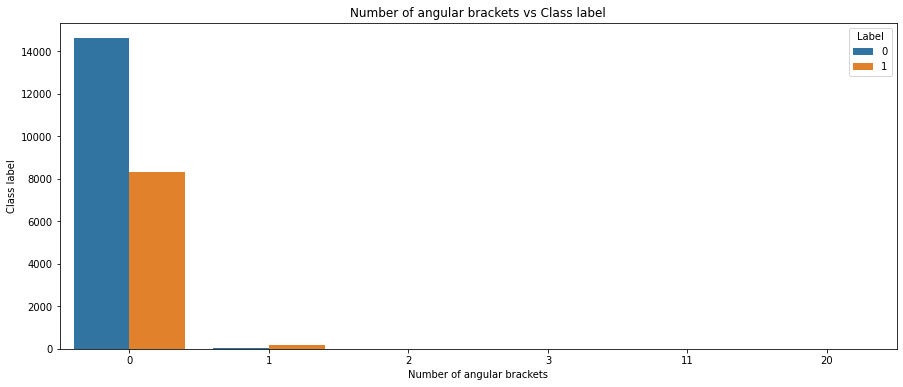

In [ ]:
plt.figure(figsize=(15,6))
ax=sns.countplot(x = 'no_anglebracket',hue = 'Label',data = X_train)
sns.move_legend(ax, "upper right")
plt.xlabel("Number of angular brackets")
plt.ylabel("Class label")
plt.title("Number of angular brackets vs Class label")
plt.show()

When we have only one number of angular bracket, it is mostly SQL injection query but this number is very small; we cannot conclude on this feature due to overlap with the Label 0 class

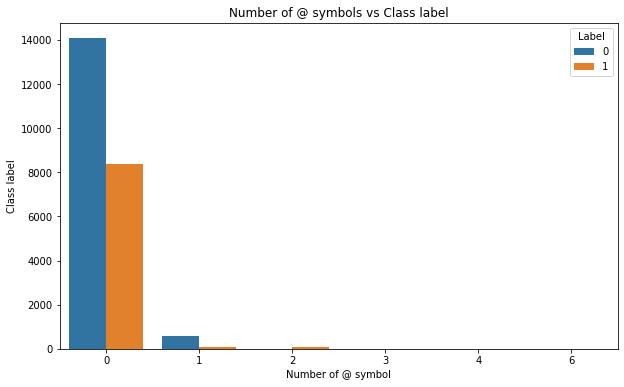

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x = 'no_atsymbol',hue = 'Label',data = X_train)
sns.move_legend(ax, "upper right")
plt.xlabel("Number of @ symbol")
plt.ylabel("Class label")
plt.title("Number of @ symbols vs Class label")
plt.show()

Here we can see that when there is only one @symbol in SQL query, it is legit. But, a small portion of such queries could be SQL injection too. But when the number of @symbols is 2, it is SQL-injected query. 

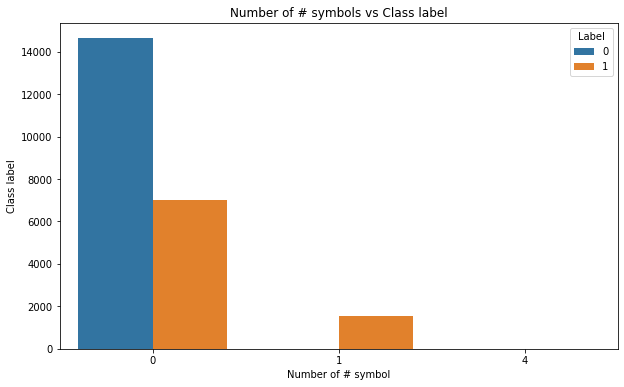

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x = 'no_hash',hue = 'Label',data = X_train)
sns.move_legend(ax, "upper right")
plt.xlabel("Number of # symbol")
plt.ylabel("Class label")
plt.title("Number of # symbols vs Class label")
plt.show()

Here # symbol is very useful feature as when it is used once in SQL query, it is harmful. 

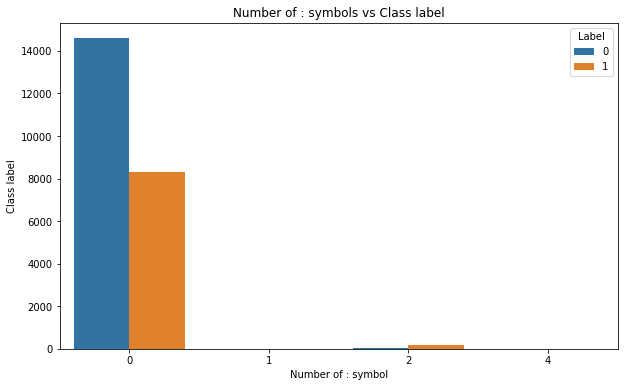

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x = 'no_colon',hue = 'Label',data = X_train)
sns.move_legend(ax, "upper right")
plt.xlabel("Number of : symbol")
plt.ylabel("Class label")
plt.title("Number of : symbols vs Class label")
plt.show()

: is not a useful feature as it doesn't demarcate between the two classes. 

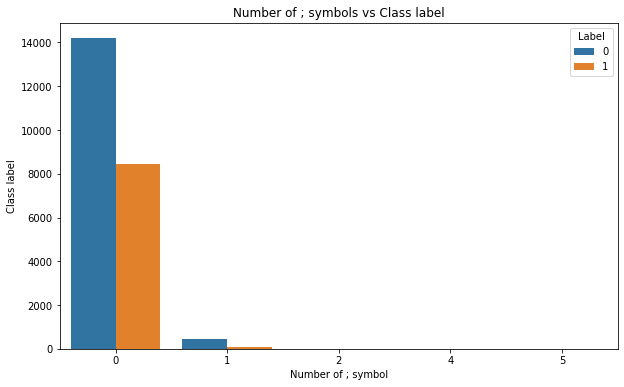

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x = 'no_semicolon',hue = 'Label',data = X_train)
sns.move_legend(ax, "upper right")
plt.xlabel("Number of ; symbol")
plt.ylabel("Class label")
plt.title("Number of ; symbols vs Class label")
plt.show()

; is more useful feature to colon. As commonly, we use ; to end the query syntax. So, when used once, it is mostly normal query. 

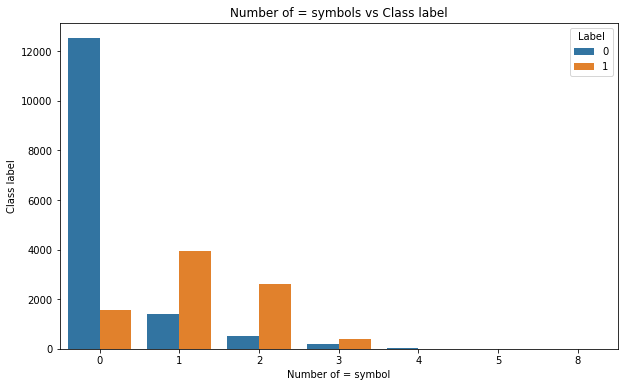

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x = 'no_equals',hue = 'Label',data = X_train)
sns.move_legend(ax, "upper right")
plt.xlabel("Number of = symbol")
plt.ylabel("Class label")
plt.title("Number of = symbols vs Class label")
plt.show()

When = is used 1,2,3 times in a query, it denotes mostly injection. But for n=4, it is of class 0. So, no conclusive takeaway from this feature due to overlap of classes 

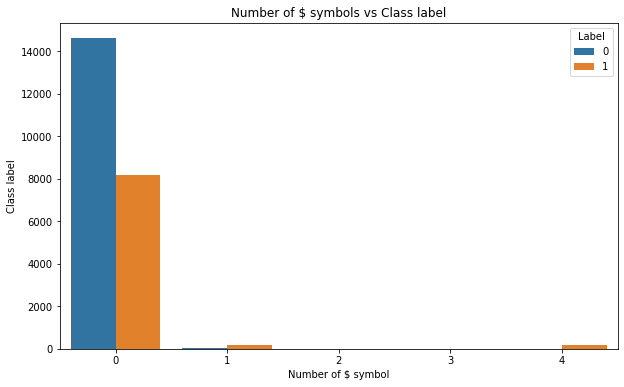

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x = 'no_dollarsymbol',hue = 'Label',data = X_train)
sns.move_legend(ax, "upper right")
plt.xlabel("Number of $ symbol")
plt.ylabel("Class label")
plt.title("Number of $ symbols vs Class label")
plt.show()

When dollar symbol is used 4 times in a query, it is sql injection. When dollar symbol is used once, we cannot conclude on anything

---



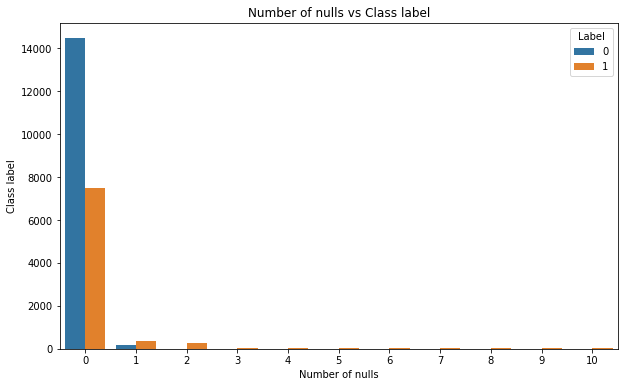

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x = 'no_nulls',hue = 'Label',data = X_train)
sns.move_legend(ax, "upper right")
plt.xlabel("Number of nulls")
plt.ylabel("Class label")
plt.title("Number of nulls vs Class label")
plt.show()

When many number of nulls appear in a query, it denotes SQL injection

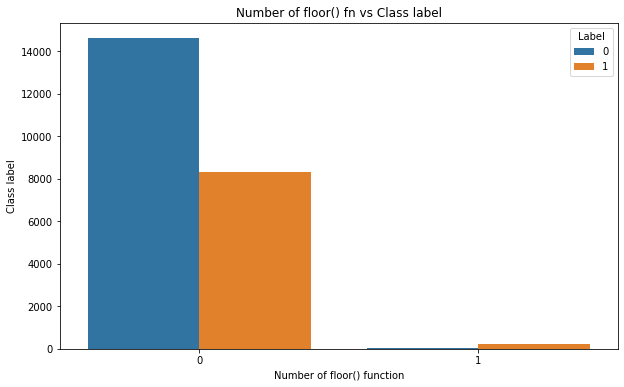

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x = 'no_floor',hue = 'Label',data = X_train)
sns.move_legend(ax, "upper right")
plt.xlabel("Number of floor() function")
plt.ylabel("Class label")
plt.title("Number of floor() fn vs Class label")
plt.show()

floor() function feature results in overlap between the two classes and not a useful feature

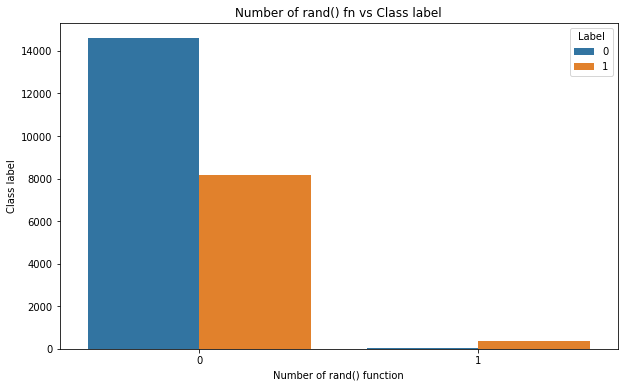

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x = 'no_rand',hue = 'Label',data = X_train)
sns.move_legend(ax, "upper right")
plt.xlabel("Number of rand() function")
plt.ylabel("Class label")
plt.title("Number of rand() fn vs Class label")
plt.show()

This is a useful feature as mostly, when rand() function is used once, it is SQL injected query

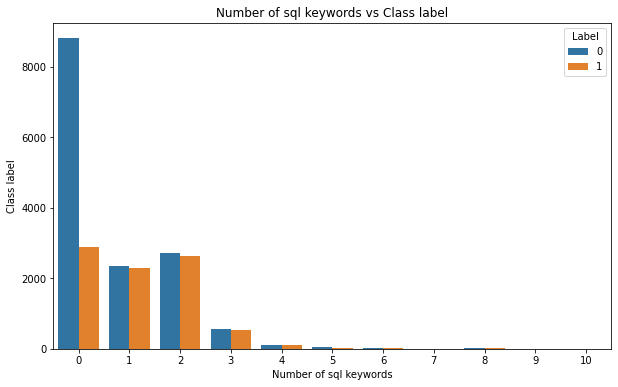

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x = 'keyword',hue = 'Label',data = X_train)
sns.move_legend(ax, "upper right")
plt.xlabel("Number of sql keywords")
plt.ylabel("Class label")
plt.title("Number of sql keywords vs Class label")
plt.show()

We see that almost similar number of keywords are used in both normal and SQL injected query. Legit query has slightly more number of keywords than injected query. So, useful feature

Now that we have done Data preprocessing, feature engineering and EDA, we will move to tokenize the query. After that, we can perform modelling and deployment. We cannot remove punctuations and special characters as part of preprocessing as this holds special importance in classifying a datapoint to belong to Label 0 or 1